# Monte-Carlosimulaties: #
### Monte-Carlo Integratie ###
[Monte-Carlo methoden](https://en.wikipedia.org/wiki/Monte_Carlo_method) omvatten een klasse van computationele algoritmen die steunen op het herhaald willekeurig samplen van een systeem om zo een gewenste systeemeigenschap te berekenen.

In dit notebook, bekijken we specifiek numerieke integratie op basis van een Monte-Carlo aanpak. Het doel is niet zozeer om een efficient integratie algoritme te creëren en bestuderen, maar wel om met de basis principes van Monte-Carlo methoden in contact te komen en te *begrijpen wat de sterkten en zwakten van deze methoden zijn*. 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.special import gamma

## 1. Hypocycloïde ##
### 1.1. Integratie ###
In de cel hieronder voeren we een simpele **Monte-Carlo integratie** van de hypocycloïde uit.

Een hypocycloïde is een 2D gesloten curve beschreven door volgende vergelijking:

$x^{\frac{2}{3}}+y^{\frac{2}{3}}=a^{\frac{2}{3}}$

Deze vorm heeft twee spiegelassen (de $x$ en $y$ assen) wat een viervoudige symmetry tot gevolg heeft. In het onderstaande zullen we ons daarom focussen op 1 kwadrant, en het resultaat met vier vermenigvuldigen om een resultaat voor de volledige cycloïde te bekomen. De oppervlakte voor deze vorm is ook analytisch gekend en wordt gegeven door:

$A=\frac{3\pi a^2}{8}$.

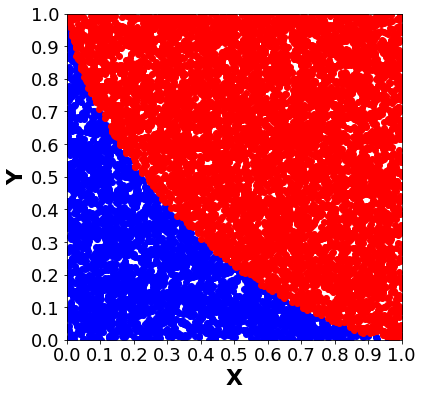

Het MC-oppervlak voor de hypocycloïde is 1.176800 (=?= 1.178097 exact)
De fout is -0.110114 %


In [2]:
# 1. Initialisatie
N=10000 # Aantal pogingen
a=1.0   # De 'a' parameter 

## Verzameling punten
# de hits
Nhit=0
xh=np.zeros(N+1) # Tijdelijk opslag met voldoende grootte.
yh=np.zeros(N+1)
# de missers
Nmis=0
xm=np.zeros(N+1)
ym=np.zeros(N+1)

power=(2.0/3.0)
a23=a**power

# 2. De MC-integratie
for j in range(N):
    x=np.random.uniform(0.0,1.0,1) # 1 random getal uniform getrokken uit het interval 0-1
    y=np.random.uniform(0.0,1.0,1) # 1 random getal uniform getrokken uit het interval 0-1
    r23=x**power+y**power
    if (r23<=a23):
        xh[Nhit]=x
        yh[Nhit]=y
        Nhit+=1
    else:
        xm[Nmis]=x
        ym[Nmis]=y
        Nmis+=1

# 3. Plotten van onze pogingen & uitschrijven van onze schatting van het oppervlak.
plt.figure(figsize=(6,6))
plt.scatter(xh[:Nhit], yh[:Nhit],  color='blue', zorder=1)
plt.scatter(xm[:Nmis], ym[:Nmis],  color='red', zorder=1)

plt.axis([0.0,1.0,0.0,1.0])
XYlst=np.linspace(0.0,1.0,11)
plt.xticks(XYlst,fontsize=18)
plt.yticks(XYlst,fontsize=18)
plt.xlabel("X",fontsize=22,fontweight="bold")
plt.ylabel("Y",fontsize=22,fontweight="bold")
plt.show()
print("Het MC-oppervlak voor de hypocycloïde is %.6f (=?= %.6f exact)" % (4.0*Nhit/N, 3.0*np.pi*a*a/8.0) )
print("De fout is %.6f %%" % (100*((4.0*Nhit/N - 3.0*np.pi*a*a/8.0)/(3.0*np.pi*a*a/8.0))) )

### Convergentie van Monte-Carlo integratie ##
Hoe snel is de integratie van een kwaleit waar we tevreden over zijn? Dit kunnen we nagaan door een steeds groter aantal pogingen uit te voeren. Praktisch dien je hiervoor niet telkens opnieuw te beginnen, maar genereer je gewoon bijkomende punten.

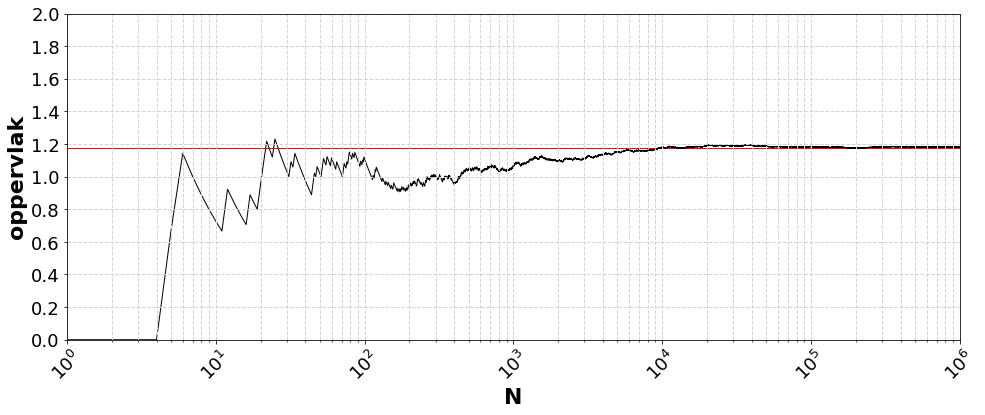

In [3]:
# 1. Initialisatie
N=1000000 # Maximum aantal pogingen
a=1.0     # De 'a' parameter
aval=3.0*np.pi*a*a/8.0  # De theoretische oppervlakte

##Verzameling punten
# de hits
Hitcount=0
Nhit=np.zeros(N+1)
Nval=np.zeros(N+1)

power=(2.0/3.0)
a23=a**power
# Genereer alle random getallen in één enkele keer, in plaats van de random functie 
# vele malen aan te roepen. Dit versnelt het algoritme, gezien de overhead van de functie
# aanroep wegvalt. (Deze mag klein zijn...maar met een miljoen keren wordt dit wel groter.)
x=np.random.uniform(0.0,1.0,N) # N random getal uniform getrokken uit het interval 0-1
y=np.random.uniform(0.0,1.0,N) # N random getal uniform getrokken uit het interval 0-1

# 2. De Monte-Carlo integratie
for j in range(N):
    r23=x[j]**power+y[j]**power
    if (r23<=a23):
        Hitcount+=1
    Nhit[j]=(Hitcount/(j+1))*4
    Nval[j]=j

# 3. Plot de resultaten
plt.figure(figsize=(16,6))
plt.plot(Nval[0:N], Nhit[0:N],   color="black"  ,linewidth=1, zorder=-1, alpha=1)
Xfl=[0,N]
Yfl=[aval,aval]
plt.plot(Xfl[0:2], Yfl[0:2],   color="red"  ,linewidth=1, zorder=-2, alpha=1)

plt.xscale("log")
plt.yscale("linear")
plt.axis([1,N,0,2.0])
plt.xticks(rotation=45,fontsize=18)
XYlst=np.linspace(0.0,2.0,11)
plt.yticks(XYlst,fontsize=18)

plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("oppervlak",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)
plt.show()

## 2. Hyper-spheres ##
Tijdens het hoorcollege maakte ik de claim dat een random grid veel efficiënter is dan een equidistant grid voor de integratie van een voorwerp...mits dit in meer dan 2 dimensies is. Bij deze oefening kun je zelf ondervinden of dit wel degelijk het geval is.

Een n-dimensionale hyper-bal is een extensie van de cirkel in een n-dimensionale hyper-ruimte. De hyper-bal wordt in algemene vorm beschreven met de volgende vergelijking:

$r^2=\sum_{i=1}^{n}{x_i^2}$

met $n$ de dimensie van de ruimte. Het volume van zo een hyperbal is ook theoretisch gekend, en heeft de volgende analytische vorm:

$V_n(r)=\frac{\pi^{\frac{n}{2}}}{\Gamma\big(\frac{n}{2}+1\big)}r^n \qquad\mathrm{waarbij} \qquad\qquad \Gamma\big(n+\frac{1}{2}\big)=\big(n-\frac{1}{2}\big)\big(n-\frac{3}{2}\big)\ldots\frac{1}{2}\cdot \pi^{\frac{1}{2}}$

In het geval dat $n$ even is vereenvoudigt $\Gamma(k)=k!$. We zouden deze functie zelf kunnen implementeren, maar ook hier laten we het zware werk doen door een wetenschappelijke python bibliotheek. De functie **[scipy.special.gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html)** helpt ons hier vooruit. (Let op, numpy heeft ook een [numpy.random.gamma](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html) functie, maar deze dient om random punten te samplen met een $\Gamma(r)$ verdeling.)

### 2.1. Convergentiegedrag ###
1. Het convergentiegedrag voor de Monte-Carlo integratie is vrij eenvoudig na te gaan, we kunnen immers steeds meer punten toevoegen. Hierdoor kun je met één run tot $N$ gridpunten ook data genereren voor alle subsets met minder dan $N$ gridpunten.
2. In het geval van een equidistant grid, dient er een nieuw grid opgesteld te worden voor elke waarde van gridpunten. Dus indien je convergentie tot $N$ punten wil uitvoeren dien je $N\times$ een grid op te stellen en een hyper-bal integratie uit te voeren. Voor het algemeen definiëren van een multidimensionaal grid zullen we gebruik maken van de magie van [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

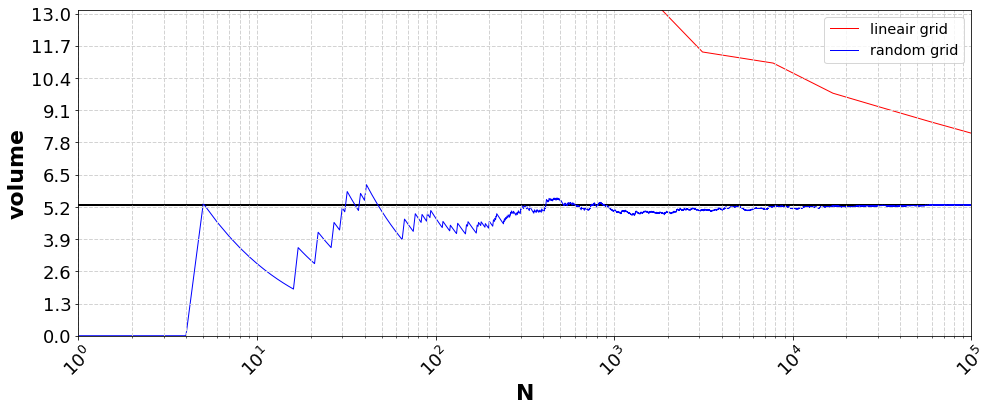

In [24]:
# 1. initialisatie
ndim=5       # Aantal dimensies
Nlin=10      # Aantal gridpunten in 1 richting van het lineaire grid
lgridstep=1  # De stapgroote bij het opstellen van de lineaire grids (Nlin/lgridstep aantal bolintegraties)
N=Nlin**ndim # Bereken het totaal aantal gridpunten
fac=2**ndim  # Factor om het n-dimensionale equivalent van een kwadrant te kunnen nemen
radius=1.0   # De straal van de hyperbol

xR=np.random.uniform(0.0,radius,(N,ndim)) # N random getallen uniform getrokken uit het interval 0-straal
n2=ndim*0.5
vol=(np.pi**n2)*(radius**ndim)/gamma(n2+1)
       
HitcR=0   # Tel de hits van het Random grid
HitcL=0   # Tel de hits van het equidistant lineair grid
NhitR=np.zeros(N+1)
NhitL=np.zeros(N+1)
cntLx=0
NhitLx=np.zeros(N+1)
Nval=np.zeros(N+1)

# 2.1. Monte-Carlo integratie: tel de hits in het random geval
for j in range(N):
    r=xR[j,:]
    rl=np.sum(r*r)
    if (rl<=radius):
        HitcR+=1
    NhitR[j]=(HitcR/(j+1))*fac
    Nval[j]=j

# 2.2. Numerieke integratie: tel de hits in het geval van het equidistante grid
for i in range(1,Nlin+1,lgridstep): # lus over mogelijke grid-sizes 
    cntLx+=1 # tel het aantal grids waarop we de hyper-bal zullen integreren
    NhitLx[cntLx]=i**ndim # totaal aantal gridpunten
    step=radius/i
    xL=np.arange(0, radius+0.5*step, step)
    sh=(xL for j in range(ndim))
    mgrids=np.meshgrid(*sh, indexing='ij') # de ster zorgt er hier voor dat de lijst als set van ndim argumenten xL wordt meegegeven
    #het mgrid object bevat ndim multidimensionele matrices, 
    #  waarbij de eerste alle x-coordinaten van de gridpunten bevat, 
    #  de tweede de y-coordinaten, etc.
    # Indexing=i,j zorgt er voor dat de x, y en z coordinaten matrices ook deze volgorde behouden
    sh2=tuple(len(xL) for j in range(ndim))
    r=np.zeros(sh2)
    for j in range(ndim):
        r=r+mgrids[j]**2
    #next tell alle punten die binnen onze straal zitten
    HitcL = (r<=radius**2).sum() # r<=radius is een boolean array, dus sum telt het aantal 'true' waarden.
    NhitL[cntLx]= HitcL*fac/NhitLx[cntLx] 
       
# 3. Plot de resultaten
plt.figure(figsize=(16,6))
plt.plot(NhitLx[0:cntLx+1], NhitL[0:cntLx+1],   color="red"  ,linewidth=1, zorder=-1, alpha=1, label='lineair grid')
plt.plot(Nval[0:N], NhitR[0:N],   color="blue"  ,linewidth=1, zorder=-1, alpha=1, label='random grid')
plt.legend(fontsize='x-large')
Xfl=[0,N]
Yfl=[vol,vol]
plt.plot(Xfl[0:2], Yfl[0:2],   color="black"  ,linewidth=2, zorder=-2, alpha=1)

plt.xscale("log")
plt.yscale("linear")
plt.axis([1,N,0,2.5*vol])
plt.xticks(rotation=45,fontsize=18)
XYlst=np.linspace(0.0,int(2.5*vol),11)
plt.yticks(XYlst,fontsize=18)

plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("volume",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)
plt.show()